In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 설명
  - region: 지역
  - country: 국가
  - emissions: 메탄 배출량
  - type: 배출 유형
  - segment: 배출 유형 세부 항목
  - reason: 배출 원인
  - baseYear: 기준 연도
  - notes: 추가 설명
- 데이터 분석 baseYear : 2019-2021
  - 2021이후의 데이터는 농업 분야에서 배출되는 메탄 배출량이 포함 되지않은 데이터이기 때문에 (출처 : IEA, UNFCCC)


In [2]:
# kaggle 데이터 사용 (출처 : 국제에너지기구(International Energy Agency))
df = pd.read_csv("../data/Methane_final.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### 데이터 기준 시점 분류


In [3]:
df["baseYear"].unique()

array(['2019-2021', '2022'], dtype=object)

In [4]:
df[df["baseYear"] == "2019-2021"]["segment"].unique()

array(['Total'], dtype=object)

In [5]:
methane2019 = df[df["baseYear"] == "2019-2021"]

In [6]:
methane2019["emissions"].describe()

count       315.000000
mean       1455.123599
std        9118.651532
min           0.051872
25%          23.845923
50%         149.169006
75%         635.284546
max      141953.765625
Name: emissions, dtype: float64

In [7]:
# 메탄 배출량이 평균 이상인 데이터 산출 함수
def get_emissions(df):
    # 메탄 배출이 평균 이상인 데이터 추출
    new_df = df[df["emissions"] > df["emissions"].mean()]
    # 배출량 내림차순 정렬
    new_df = new_df.sort_values(by="emissions", ascending=False)
    # region, country 데이터 필터링
    filtered_df = new_df[
        (new_df["country"] != "World")
        # & (new_df["country"] != "European Union")
        # & (~new_df["country"].str.startswith("Other"))
        & (new_df["region"] != "Other")
    ]
    filtered_df.drop(columns="Unnamed: 0", inplace=True)
    return filtered_df

In [8]:
# 2019-2021 기간 동안의 메탄 배출량이 평균 이상이 데이터
filtered_methane2019 = get_emissions(methane2019)
filtered_methane2019

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\473888776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns="Unnamed: 0", inplace=True)


,region,country,emissions,type,segment,reason,baseYear,notes
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
884,Europe,European Union,8851.337891,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
502,Asia Pacific,India,5551.760742,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
618,Asia Pacific,Pakistan,5319.456055,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1408,North America,United States,5117.928223,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
523,Asia Pacific,Indonesia,4568.938477,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [9]:
filtered_methane2019["country"].unique()

array(['China', 'India', 'Brazil', 'United States', 'European Union',
       'Pakistan', 'Indonesia', 'Russia',
       'Other countries in Southeast Asia', 'Argentina',
       'Other EU17 countries', 'Australia', 'Mexico', 'Bangladesh',
       'Other countries in Europe', 'Vietnam', 'Nigeria', 'Thailand',
       'Ethiopia', 'Colombia', 'Philippines', 'France', 'Sudan'],
      dtype=object)

In [10]:
# filtered_methane2019[:10]

In [11]:
# 매탄 배출량이 평균 이상인 나라 중 개별 지역 값의 비중
filtered_methane2019["region"].value_counts(normalize=True)

region
Asia Pacific                 0.393939
Europe                       0.212121
Central and South America    0.121212
North America                0.121212
Africa                       0.090909
Russia & Caspian             0.060606
Name: proportion, dtype: float64

In [12]:
# barplot
bar_df = methane2019[(methane2019["region"] != "World")]
bar_df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
13,13,Africa,Algeria,6.475721,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
14,14,Africa,Algeria,510.965607,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
15,15,Africa,Angola,400.969574,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
29,29,Africa,Angola,81.709923,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
...,...,...,...,...,...,...,...,...,...
1509,1509,Russia & Caspian,Turkmenistan,1.414801,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
1510,1510,Russia & Caspian,Turkmenistan,48.029812,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1511,1511,Russia & Caspian,Uzbekistan,901.682617,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1524,1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [13]:
bar_df["region"].unique()

array(['Africa', 'Asia Pacific', 'Central and South America', 'Europe',
       'Middle East', 'North America', 'Other', 'Russia & Caspian'],
      dtype=object)

<Axes: xlabel='emissions', ylabel='region'>

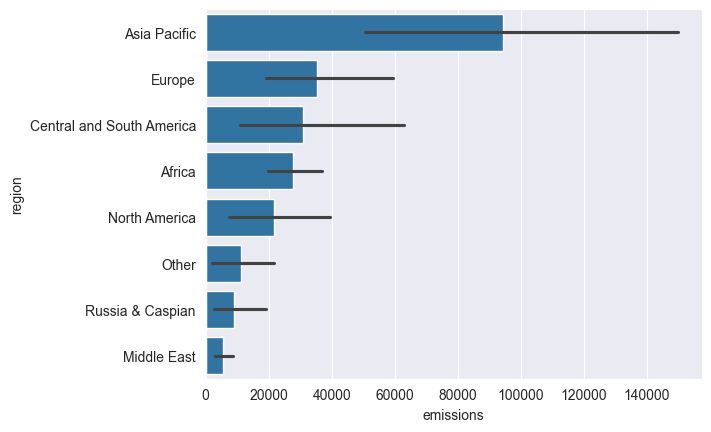

In [14]:
# region 별 emissions 총합 Barplot
# barplot 검정 선의 의미 : 데이터의 신뢰 구간을 의미, min / max 값의 범위와 데이터의 분포가 검정 선의 범위만큼 넓다는 의미
sns.barplot(
    bar_df,
    x="emissions",
    y="region",
    estimator="sum",
    order=[
        "Asia Pacific",
        "Europe",
        "Central and South America",
        "Africa",
        "North America",
        "Other",
        "Russia & Caspian",
        "Middle East",
    ],
)

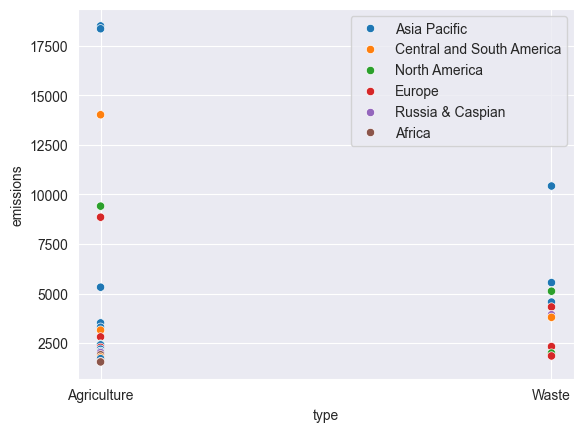

In [15]:
# Scatterplot - 산업별 emissions 분포를 region으로 그룹화
sns.scatterplot(data=filtered_methane2019, x="type", y="emissions", hue="region")
plt.legend(prop={"size": 10})
plt.show()

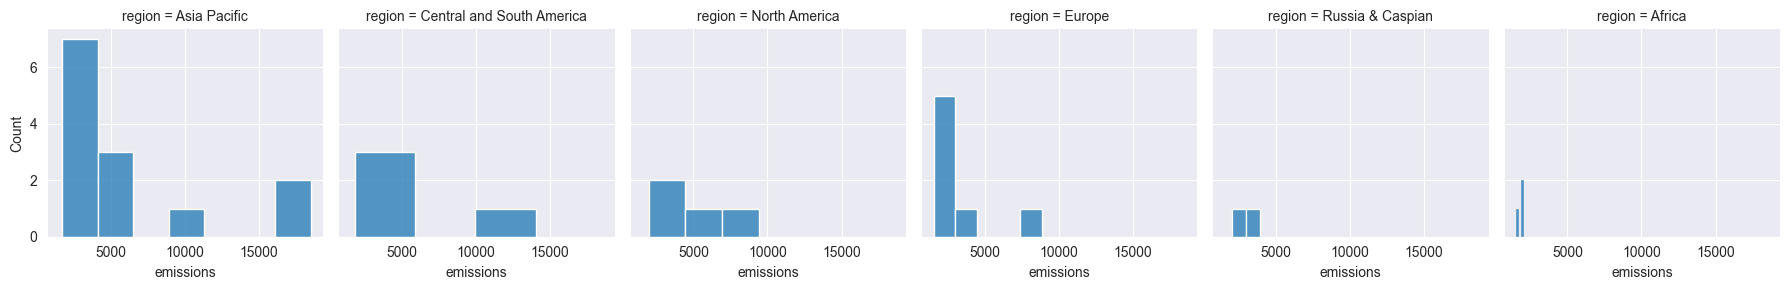

In [16]:
# FacetGrid - 특정 region의 emissions 구간별 Country 카운트
grid = sns.FacetGrid(
    data=filtered_methane2019,
    col="region",
)
grid.map(sns.histplot, "emissions")
plt.show()
# 결과 : emissions 범위에 해당하는 region > country의 count를 시각화한 그래프

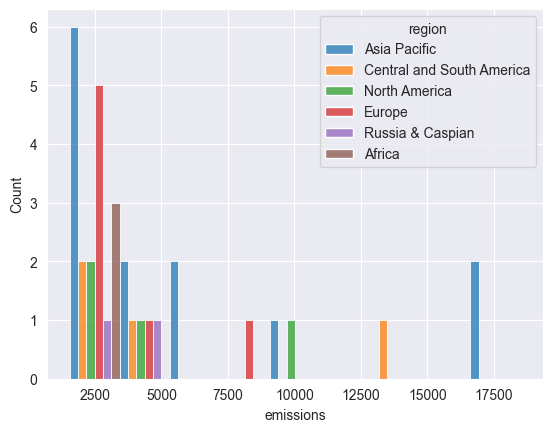

In [17]:
# Histplot - region의 emissions 구간별 Country 카운트
sns.histplot(
    data=filtered_methane2019,
    x="emissions",
    hue="region",
    multiple="dodge",
)
plt.show()

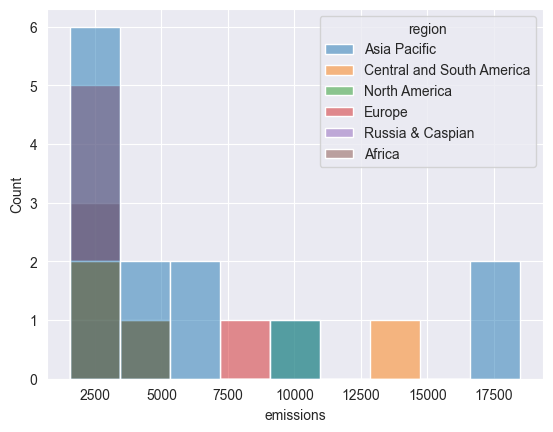

In [18]:
# Histplot - region의 emissions 구간별 Country 카운트
sns.histplot(
    data=filtered_methane2019,
    x="emissions",
    hue="region",
    multiple="layer",
)
plt.show()

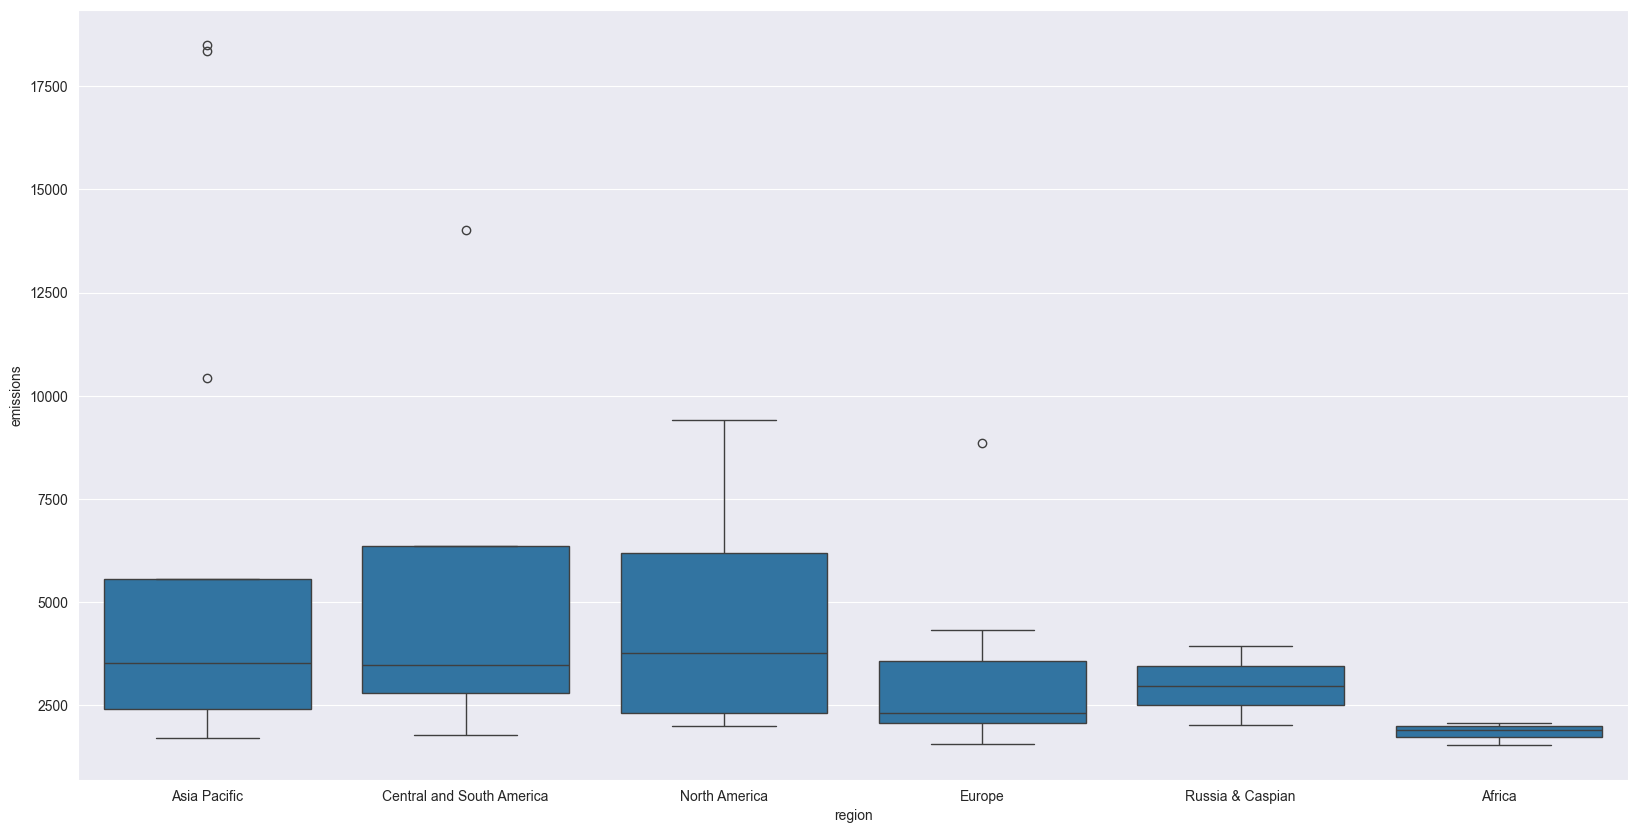

In [19]:
# Boxplot - region 별 emissions 데이터 분포와 이상치
plt.figure(figsize=(20, 10))
sns.boxplot(filtered_methane2019, x="region", y="emissions")
plt.show()

In [20]:
filtered_methane2019["country"].values

array(['China', 'India', 'Brazil', 'China', 'United States',
       'European Union', 'India', 'Pakistan', 'United States',
       'Indonesia', 'European Union', 'Russia', 'Brazil', 'Indonesia',
       'Other countries in Southeast Asia', 'Argentina',
       'Other EU17 countries', 'Australia', 'Mexico', 'Bangladesh',
       'Other countries in Europe', 'Other countries in Europe',
       'Vietnam', 'Nigeria', 'Thailand', 'Russia', 'Mexico', 'Ethiopia',
       'Other EU17 countries', 'Colombia', 'Philippines', 'France',
       'Sudan'], dtype=object)

In [21]:
df1 = filtered_methane2019[filtered_methane2019["region"] == "Asia Pacific"]
df1["type"].value_counts(normalize=True)

type
Agriculture    0.769231
Waste          0.230769
Name: proportion, dtype: float64

In [22]:
df3 = filtered_methane2019[filtered_methane2019["country"] == "China"]
df3["type"].value_counts(normalize=True)

type
Agriculture    0.5
Waste          0.5
Name: proportion, dtype: float64

In [23]:
pivot_data = methane2019.pivot_table(index=["region", "type"], values="emissions")

def get_pie(str):
    region_data = pivot_data.loc[(str)]
    plt.pie(
        region_data["emissions"],
        labels=region_data.index,
        autopct="%1.1f%%",
        startangle=140,
    )
    plt.title(str, fontsize=14)
    plt.show()

In [24]:
region_list = list(pivot_data.index.get_level_values(0).unique())
region_list

['Africa',
 'Asia Pacific',
 'Central and South America',
 'Europe',
 'Middle East',
 'North America',
 'Other',
 'Russia & Caspian',
 'World']

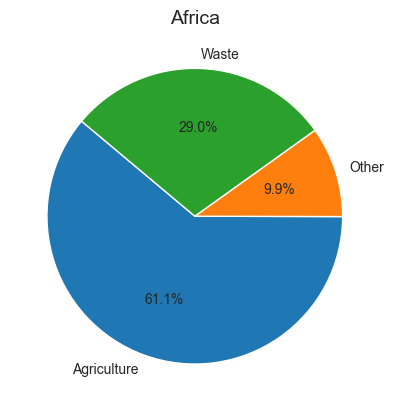

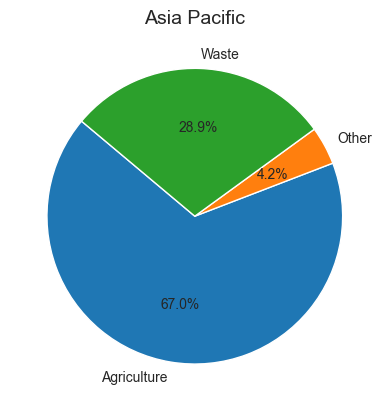

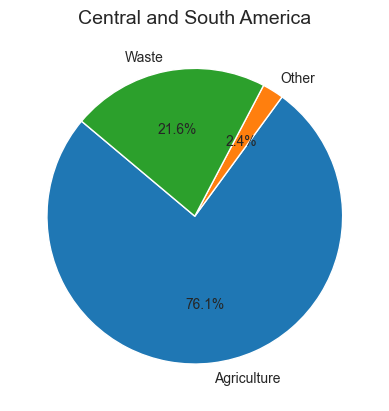

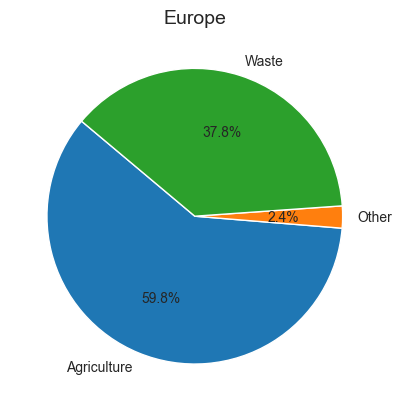

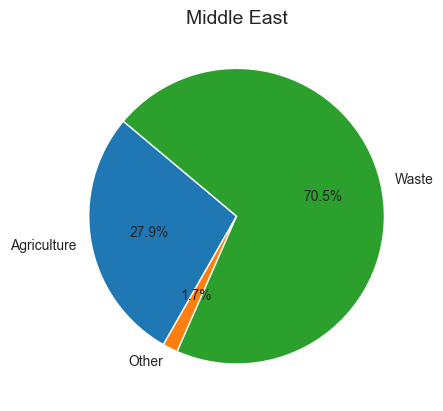

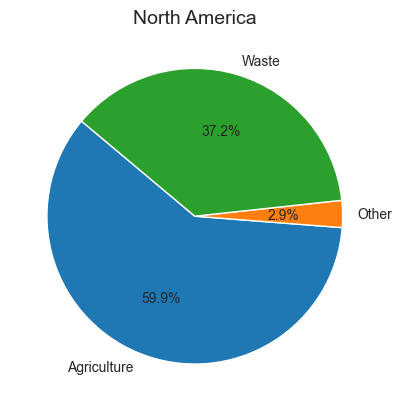

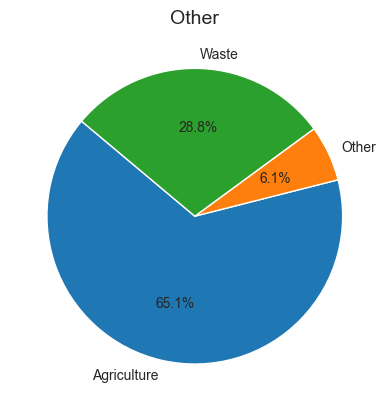

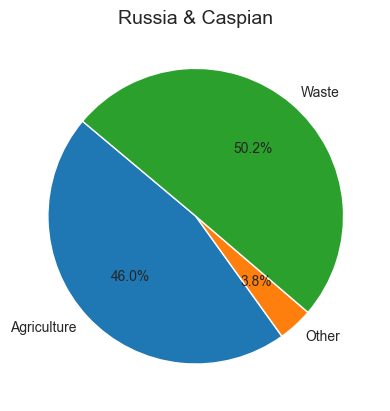

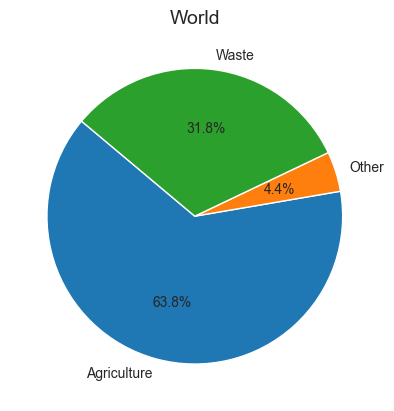

In [25]:
# region 별 산업(Type) 비율 Pie Chart
for i in range(len(region_list)):
    get_pie(region_list[i])

In [26]:
# region > country 별 배출량
tmp = methane2019.pivot_table(index=["region", "country"], values="emissions")
tmp

emissions
region           country                   
Africa           Algeria         258.350845
                 Angola          211.391182
                 Benin            63.682049
                 Botswana        314.299025
                 Cameroon        165.996117
...                                     ...
Russia & Caspian Kazakhstan      326.146719
                 Russia         2092.253988
                 Turkmenistan    118.105459
                 Uzbekistan      395.315492
World            World         74150.116862

[105 rows x 1 columns]

In [27]:
# region > country 별 배출량 emissions 내림차순
sorted_df = tmp.sort_values(by=["region", "emissions"], ascending=[True, False])
sorted_df

emissions
region           country                   
Africa           Nigeria        1097.251038
                 Tanzania        877.623413
                 Ethiopia        834.295609
                 Sudan           606.385399
                 Egypt           548.156480
...                                     ...
Russia & Caspian Uzbekistan      395.315492
                 Kazakhstan      326.146719
                 Turkmenistan    118.105459
                 Azerbaijan      100.144331
World            World         74150.116862

[105 rows x 1 columns]